# Homework 2: Exercise 3

Here we use the gradient descent algorithm:
do $x_{k+1}=x_{k}-\alpha_k\nabla f(x_k)$
where $f$ is the negative log-likelihood until convergence.

The negative log-likelihood is

$$-L(a,\beta)=-\sum_{i=1}^my_i(a^Tu_i+\beta)-\log(1+\exp(a^Tu_i+\beta)).$$

By calculation, the gradient of the negative log-likelihood is 

$$-\nabla L(a,\beta)=-\sum_{i=1}^m\left(y_i-\frac{1}{1+\exp(-a^Tu_i-\beta)}\right)\left(                 
  \begin{array}{c}   
    u_i\\
    1\\
  \end{array}
\right)           $$

and

\begin{equation}
\nabla^2 L(a,\beta)=\sum_{i=1}^m\frac{\exp(a^Tu_i+\beta)}{(1+\exp(a^Tu_i+\beta))^2}\left(                 
  \begin{array}{c}   
    u_i\\
    1\\
  \end{array}
\right)(u_i^T,1).
\end{equation}

Denote $U=[u_1,u_2,\cdots,u_m]^T$ and $X=[U,\textbf{1}_m]$ where $\textbf{1}_m=(1,1,\cdots,1)^T$; $\Sigma=diag(\lambda_1,\cdots,\lambda_m)$ where $\lambda_i=\frac{\exp(a^Tu_i+\beta)}{(1+\exp(a^Tu_i+\beta))^2}$, then $\nabla^2 L(a,\beta)=X\Sigma X^T$. 

Also for all $i=1,\cdots,m$,

\begin{equation}
\left|\lambda_i\right|=\frac{\exp(a^Tu_i+\beta)}{(1+\exp(a^Tu_i+\beta))^2}=\frac{\exp(a^Tu_i+\beta)}{1+\exp(a^Tu_i+\beta)}\left(1-\frac{\exp(a^Tu_i+\beta)}{1+\exp(a^Tu_i+\beta)}\right)\leq \frac{1}{4}.
\end{equation}

Then we have $\nabla^2 L(a,\beta)=X\Sigma X^T\preceq\frac{1}{4}XX^T$ and $\|\nabla^2 L(a,\beta)\|\leq\frac{\|X\|^2}{4}$. So we can choose $L=\frac{\|X\|^2}{4}$, i.e. the step size $\alpha_k=\frac{1}{L}=\frac{4}{\|X\|^2}$ for all $k$.

The gradient descent function is as below:

In [1]:
function GD(f,Df,alpha,x0,step,tol)
    diff=norm(Df(x0));i=0;
    while diff>tol && i<=step
        x=x0-alpha*Df(x0);
        diff=norm(Df(x));
        i=i+1;
       # println("The ",i,"th difference is ",diff)
        x0=x
    end
    if diff>tol
        println("The diff is greater than tol and the diff=",diff)
    end
        return(x0)
end 

GD (generic function with 1 method)

For the Admission dataset: we consider the GRE and GPA scores in determining admission outcomes. The GRE score are between 200 and 800 and the GPA are between 2 and 4, we consider the GRE/200 here: then $a_1=\frac{\tilde{a}_1}{200}$. 

Using the new dataset, I can get the Negative-loglikelihood function and the gradient of the Negative-loglikelihood function as below:

In [2]:
using DataFrames
admission=readtable("C:/Users/lenovo/Desktop/Mat258a-numerical optimization/Homeworks/Homework2/binary.csv");
u=convert(Array,admission[:,2:3]);
u2=float(u*Diagonal([1/200,1]))
y=convert(Array,admission[:,1]);
X=[ones(400) u2]
m=size(admission,1)

#Negative log-likelihood
function NL(x,u,y,m)
    s=0
    for i=1:m
        s=s-y[i]*(x[1]+x[2]*u[i,1]+x[3]*u[i,2])+log(1+exp(x[1]+x[2]*u[i,1]+x[3]*u[i,2]))
    end
    return(s)
end
f(x)=NL(x,u2,y,m)

#Gradient of negtive log-likelihood
function NLD(x,u,y,m)
    s=zeros(3)
    for i=1:m
        s=s-(y[i]-1/(1+exp(-x[1]-x[2]*u[i,1]-x[3]*u[i,2])))*[1,u[i,1],u[i,2]]
    end
    return(s)
end
Df(x)=NLD(x,u2,y,m)

Df (generic function with 1 method)

In order to use the gradient descent method, we need to calculate the step size $\alpha_k=\frac{1}{L}=\frac{4}{\|X\|^2}$ for all $k$:

In [3]:
alpha=4/norm(X)^2

0.00046683276468109826

Then use the gradient descent function, we can get $x_*$ and $\min f(x)$ as below:

In [4]:
step=100000
tol=0.00000000001
x0=zeros(3)
x=GD(f,Df,alpha,x0,step,tol)
[x./[1,200,1],f(x)]

4-element Array{Float64,1}:
  -4.94938   
   0.00269068
   0.754687  
 240.172     

Moreover, if I do the iteration 50000 times, I can get the  minimizer $x_*$ and $\min{f(x)}$ :

In [5]:
x=ones(3)
for i=1:50000
    x=x-alpha*NLD(x,u2,y,m)
end
[x.*[1,1/200,1],NL(x,u2,y,m)]

4-element Array{Float64,1}:
  -4.94938   
   0.00269068
   0.754687  
 240.172     

From the results above, we can see the two results are the same.
In conclusion, the minimizer of our objective function is 

$$\hat{\beta}=-4.94938\quad\hat{\alpha}=(0.00269068,0.754687)$$ and $$\min f(x)=f(x_*)=240.172.$$





The scatter plot of my data: GRE vs GPA, where "+" means positive admissions and "o" means negative admissions.

INFO: Loading help data...


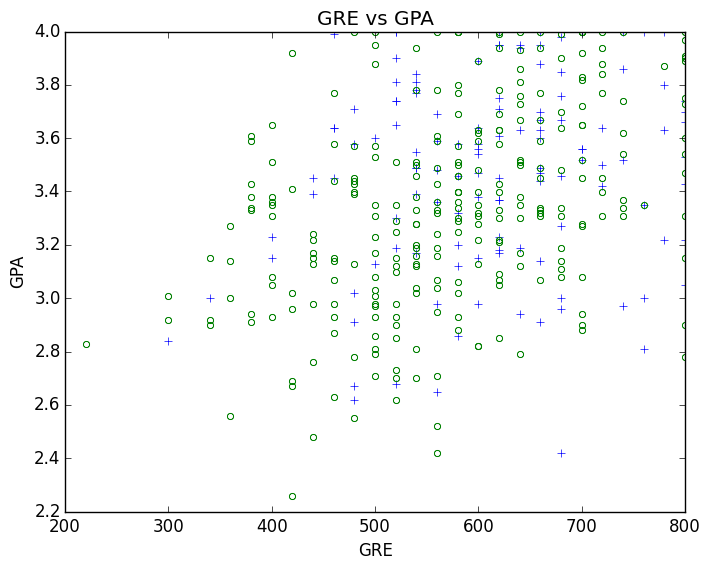

PyObject <matplotlib.text.Text object at 0x0000000025DC7358>

In [6]:
admit=admission[admission[:,1].==1,2:3];
reject=admission[admission[:,1].==0,2:3];
using PyPlot
plot(admit[:,1],admit[:,2],"+")
plot(reject[:,1],reject[:,2],"o",markersize=5,markeredgewidth=0.75,markeredgecolor="g",markerfacecolor="None")
xlabel("GRE")
ylabel("GPA")
title("GRE vs GPA")

Finally, based on the regression parameter above, the decision boundary at level 0.5 is as below

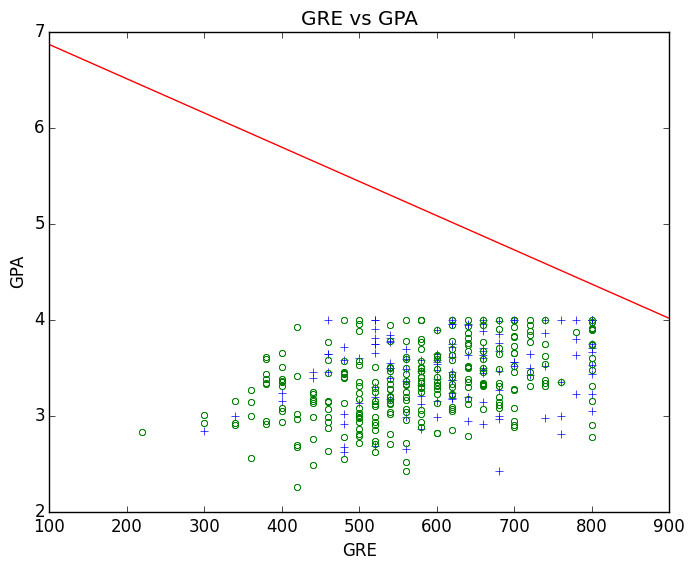

PyObject <matplotlib.text.Text object at 0x0000000002EE59E8>

In [7]:
#The decision boundary at level 0.5: 0.00269068GRE+0.754687GPA-4.94938=1/2
op=x.*[1,1/200,1]
plot(admit[:,1],admit[:,2],"+")
plot(reject[:,1],reject[:,2],"o",markersize=5,markeredgewidth=0.75,markeredgecolor="g",markerfacecolor="None")
x0=100:1:900;
y0=(0.5-op[1]-op[2]*x0)./op[3]
plot(x0,y0)
xlabel("GRE")
ylabel("GPA")
title("GRE vs GPA")

By the definition in the GLM class, the decision boundary at level 0.5: 0.00269068GRE+0.754687GPA-4.94938=0, we can get the figure below:

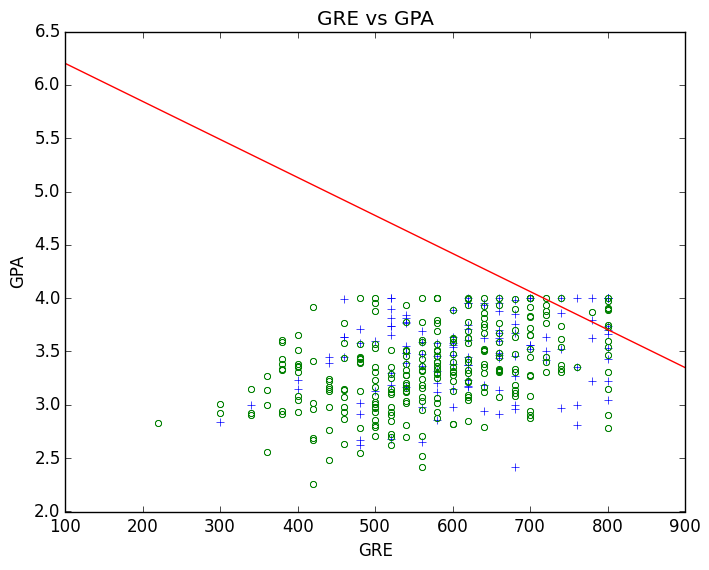

PyObject <matplotlib.text.Text object at 0x0000000025C2FC88>

In [8]:
#The decision boundary at level 0.5: 0.00269068GRE+0.754687GPA-4.94938=0
op=x.*[1,1/200,1]
plot(admit[:,1],admit[:,2],"+")
plot(reject[:,1],reject[:,2],"o",markersize=5,markeredgewidth=0.75,markeredgecolor="g",markerfacecolor="None")
x0=100:1:900;
y0=(-op[1]-op[2]*x0)./op[3]
plot(x0,y0)
xlabel("GRE")
ylabel("GPA")
title("GRE vs GPA")

From the figure above, we can see that we cannot use the decision boundary to detect whether one person is positive admission or negative admission. Logistic regression does not work good here.





In this problem, I first deal with the original data. However, I found that the convergence rate of the gradient descent is very slow. After 100000 iterations, the $f(x)$ is still around 254. Then I realized that the value of GRE are between 200 and 800, but the value of GPA are only between 2 and 4. Then I try the data GRE/200, it convergences much faster: After less than 50000 iterations, it converges to the true value. This is actually feature scaling: a method used to standardize the range of independent variables or features of data.
